# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [3]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tell iPython to include plots inline in the notebook
%matplotlib inline
from IPython.display import display

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
X = data
Y = data.columns
n_samples, h = data.shape
print "Dataset has {} rows, {} columns".format(*data.shape)
display(data.head()) # print the first 5 rows

Dataset has 440 rows, 6 columns


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer:

### PCA:

PCA will maximize variance and help us reduce the dimensionality. So in general terms I expect the PCA analisis to show how buying from multiple categories together will help us identify what segments exists (based on the combined purchases on different categories) so we can then decide how to group and where to put each customer.
Looking at the head of the data, it seems like this distributor sells fresh, milk, frozen and groceries more than the other 2 categories. Knowing the type of distributor we are dealing with should help us understand the type of clients that shop here and how we can group them together. Exploring the dada we find that teh "Fresh" category is looking like it will be the prinipal factor.

### ICA:

ICA will help us find ways to maximize independence. I would expect ICA to tell us what independent new "features" could be used to best represent this data with new independent features. ICA should give us a 6x6 view/vector as we have 6 dimensions. The vectors should show how the diferent combinations of preferences can yield different categories of customers.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
PC1,-0.976537,-0.121184,-0.061540,-0.152365,0.007054,-0.068105
PC2,-0.110614,0.515802,0.764606,-0.018723,0.365351,0.057079
PC3,-0.178557,0.509887,-0.275781,0.714200,-0.204410,0.283217
PC4,-0.041876,-0.645640,0.375460,0.646292,0.149380,-0.020396
PC5,0.015986,0.203236,-0.160292,0.220186,0.207930,-0.917077
PC6,-0.015763,0.033492,0.410939,-0.013289,-0.871284,-0.265417


,1,2,3,4,5,6
0,0.459614,0.405172,0.07003,0.044023,0.015022,0.006138


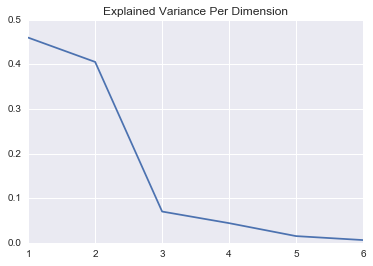

In [7]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA().fit(X)

# Print the components and the amount of variance in the data contained in each dimension
pca_df = pd.DataFrame(pca.components_, columns=list(data.columns), index=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6",])
display(pca_df)
dim_df = pd.DataFrame(pca.explained_variance_ratio_).transpose()
dim_df.columns = ["1", "2", "3", "4", "5", "6"]
#print pca.explained_variance_ratio_
display(dim_df)
plt.plot(dim_df.T)
plt.title("Explained Variance Per Dimension")

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: 


As seen on the figure, between the first and second dimension there is a 0.054442 drop.

Between the second and third the drop is much grater (0.335142).

With 2 dimesions we will represent most of the variance (0.864786) and will also be able to represent this in a 2D diagram. The complexity of adding a third or 4th dimesion is not worth the small gain in represented variance.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: 
The first component is mostly made up of largely Fresh and a little Frozen and Milk.
The second component is made up of Grocery, Milk and Detergents_Paper.

This tells us that the best way to reduce the data from 6 dimensions into 2 with the minimal loss of data is to think about separating customers based on how much they consume in Fresh, then Milk and the Groceries and Detergents_Paper. By reducing the dimesnionality we can avoid the "curse of dinensionality" where the necesary data grwos exponentailly to the number of dimensions and 2D has the added benefit of baeing easily repsresented on a 2d graph.

### ICA

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
IC1,-0.010908,-0.001086,0.007308,0.054056,-0.002541,-0.016757
IC2,0.002538,-0.012328,0.069129,0.001424,-0.013749,-0.005441
IC3,-0.004906,-0.001539,-0.005621,-0.002525,0.002384,0.050929
IC4,-0.003363,0.018630,0.108990,-0.007232,-0.133386,-0.016023
IC5,-0.050266,0.006472,0.007482,0.003224,-0.011471,0.002708
IC6,-0.001939,-0.072455,0.056476,0.001674,-0.017140,0.016956


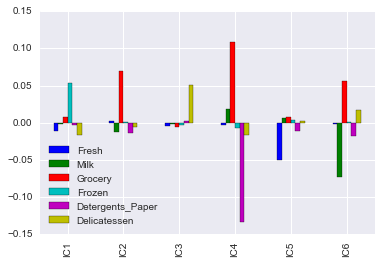

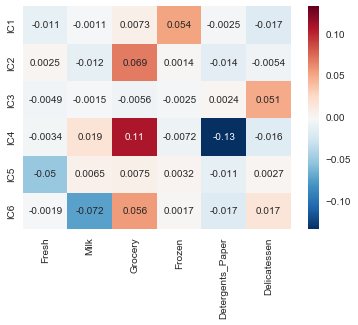

In [12]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
# use a random_state to make it consistent between runs
ica = FastICA(random_state=42).fit(data_scaled)
# Print the independent components
ica_df = pd.DataFrame(ica.components_, columns=list(data.columns), index=["IC1","IC2","IC3","IC4","IC5","IC6"])
display(ica_df)

ica_df.plot(kind = 'bar')
plt.figure()
sns.heatmap(ica_df, annot=True)

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 

**IC1:** Customers here show a preference for ordering frozen foods.

**IC2:** Customers here show a preference for ordering groceries.

**IC3:** Customers here show a preference for ordering Delicatessen.

**IC4:** Customers here show both a preference for grocery and little ordering of Detergents_Paper products.

**IC5:** Customers here seem to be very similar, only ordering less Fresh foods.

**IC6:** Here we see a clear preference for Grocery and a lack of shopping for milk.

The components help us identify independent types of customers, which would allow us to segment them maximizing their independence, in order to avoid the problem described in the breif, where customers were assumed to be the same, until changing the delivery revealed different types of customers responded differently.

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 

KMeans is based on a very simple algorithm, starting with random centers, and trying to minimize the distance between all the points or a center, moving the center and iterating until a set amount.
GMM is based on finding subpopulations by finding sub gaussians that fit the data.

KMeans is very fast and cheap, which makes it a great choice when resources are limited.
GMM is more complex and in real world comparisons appears to be slower than SKleanrs implementation of KMeans.
    
KMeans depends on a random assignment of initial centroids, which will vary on each run and will change the resulting clusters while GMM will be consistent.
    
In KMeans, one item can only belong to one cluster (no "soft clusters"), GMM provides soft cluster support.

Given the small amount of data, speed will not be a mayor consideration, so we will go with GMM.
    

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [17]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [15]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
reduced_data = PCA(n_components=2).fit_transform(data)
reduced_data_df = pd.DataFrame(reduced_data[:10], columns=["1", "2"])
display(reduced_data_df) # print up to 10 elements

,1,2
0,-650.022122,1585.519090
1,4426.804979,4042.451509
2,4841.998707,2578.762176
3,-990.346437,-6279.805997
4,-10657.998731,-2159.725815
5,2765.961593,-959.870727
6,715.550892,-2013.002266
7,4474.583667,1429.496972
8,6712.095397,-2205.909156
9,4823.634354,13480.559205


In [24]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters_2 = GMM(n_components=2).fit(reduced_data)

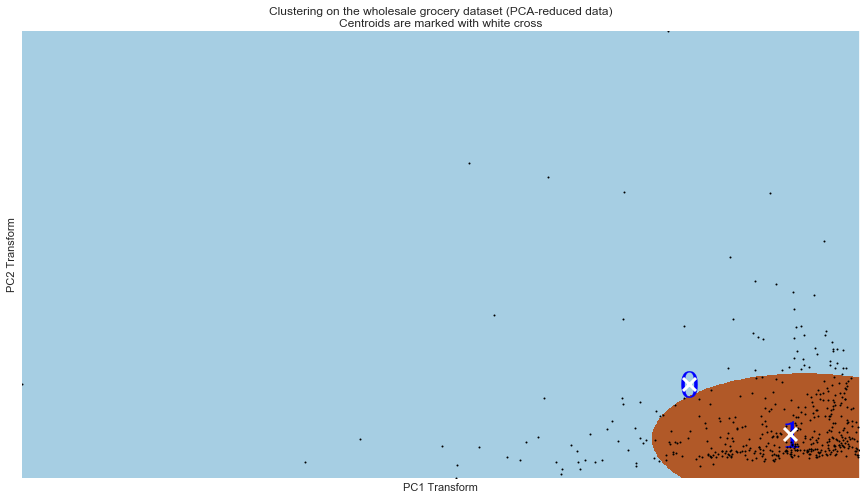

In [109]:
def plot_clustering(clusters):
    # Plot the decision boundary by building a mesh grid to populate a graph.
    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    hx = (x_max-x_min)/1000.
    hy = (y_max-y_min)/1000.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])
    centroids = clusters.means_
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.figure(figsize=(15,8))
    plt.clf()
    
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')
               
    plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2*2)
    
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    for i, c in enumerate(centroids):
        plt.scatter(c[0], c[1], marker='${}$'.format(i), alpha=1, s=700, color='b')
    plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
              'Centroids are marked with white cross')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.ylabel("PC2 Transform")
    plt.xlabel("PC1 Transform")
    plt.legend()
    plt.show()
plot_clustering(clusters_2)

Here we can see there are two general groups. but just by looking at it we can intuitively see more clusters than just these 2. We will now explore with 4 clusters.

In [112]:
clusters_4 = GMM(n_components=4).fit(reduced_data)

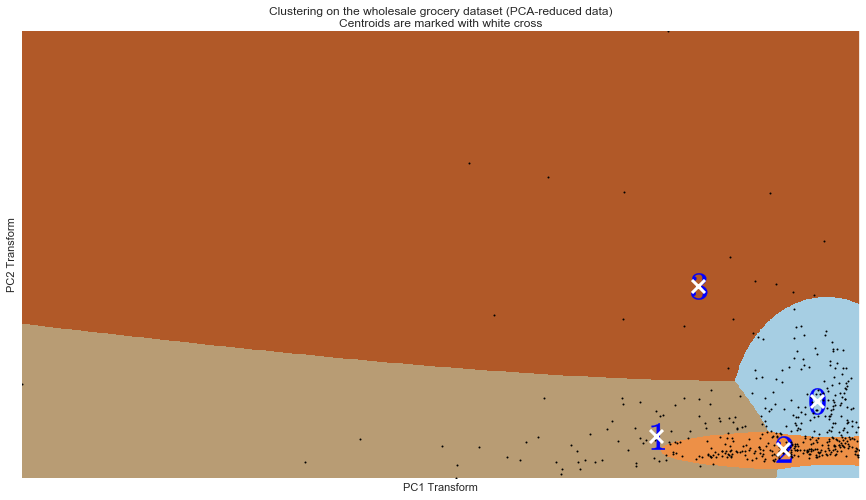

In [115]:
#Keep this on a separate cell so we can draw without re-fitting and moving hte clusters around
plot_clustering(clusters_4)

## Sampling

In [119]:
# Use the GMM to categorize the customers
categorized = clusters_4.predict(reduced_data)

# Print a sample from each cluster
# Check if what we are seeing on the plot can also be seen on the actual data
print "Cluster 0 Sample:"
display(data[categorized == 0].head(1))
#print data[categorized == 0].head(1).sum(axis=1).iloc[0]

print "Cluster 1 Sample:"
display(data[categorized == 1].head(1))
#print data[categorized == 1].head(1).sum(axis=1).iloc[0]

print "Cluster 2 Sample:"
display(data[categorized == 2].head(1))
#print data[categorized == 2].head(1).sum(axis=1).iloc[0]

print "Cluster 3 Sample:"
display(data[categorized == 3].head(1))
#print data[categorized == 3].head(1).sum(axis=1).iloc[0]

Cluster 0 Sample:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338


Cluster 1 Sample:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
4,22615,5410,7198,3915,1777,5185


Cluster 2 Sample:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
3,13265,1196,4221,6404,507,1788


Cluster 3 Sample:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
23,26373,36423,22019,5154,4337,16523


**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

We can remember that the PC1 was mostly made up of Fresh which we see along the X axis.
The PC2, shown along the Y axis, is mostly made up of Grocery, Milk and Detergents.

**Cluster 2**: These customers are clearly the ones most dominated by the PC1, ordering mostly Fresh.

**Cluster 1**: Large customers of Fresh but more influenced by PC2 than cluster 2, meaning these consume large Fresh orders and also some Grocery, Milk and Detergents.

**Cluster 0**: Blue is mostly influenced by the PC2 but also shows some degree of influence by PC1, I would call this smaller customers that buy a less Fresh than Grocery, Milk and Detergents

**Cluster 3**: Very large customers that dont buy a lot of Fresh and mostly buy PC2 items.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: 

The PCA was very insightful as it both reduced the problem from 6 to just 2 dimensions and determined what might be good ways of categorizing the customers based on a combiantion of what they purchase captureing most of the variation in just 2 components. In order to get even more insight of the data, we paired the PCA with the GMM to look for clusters within the components to gain more infomration about how the customer behavoir turns into a category.

**9)** How would you use that technique to help the company design new experiments?

Answer: 

Now we know what types of customers the distributor has, so we could for example design a campaign to incentivize low Fresh consumers into buying more. This campaing whould not be sent to the consumers who are already large Fresh consumers. If the experiment was a new type of delivery for fresh foods, we could A/B test it on two diferent clusters and estimate how this change would affect all customers in these clusters based on the sample.
This could even generate data that justifies the need for different delivery methods/schedules for different types of customers.

**10)** How would you use that data to help you predict future customer needs?

Answer: 

With this PCA+GMM analysis we have gained insight into the data. But we have also gained a model that can now be used to predict customer types and therefore to anticipate their needs. In the case of a prospective new customer, all we would need is their expected consumption and this would be enough to categorize them according to the model. With the results from our model we coul offer special deals, adjust the sales pitch, adjust delivery times and modes and better serve new and exisitng customers. The model could even be used to know what type of customers the sales team should focus on.

References:

https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/

http://matplotlib.org/api/markers_api.html